# Martinez Assn 5
## Decision Trees

You are tasked to create a decision tree that uses the above data to compute the decision on whether to drive a car, given the conditions depicted by the three variables in the table. 
Consult the decision tree package, https://scikit-learn.org/stable/modules/tree.html and using a Jupyter notebook, implement the following in Python:

    a. Calculate the information gain for x1, x2 and x3.
    b. Choose the root node for the decision tree.
    c. Plot a partial decision tree from root node along with training examples sorted to each of its descendent nodes.
    d. You are required to continue with the decision-tree growing process until all nodes are pure (they contain examples that all have the same classification). 
    e. Will it be possible to reach this situation for the given dataset? If not, why not? (Hint: Look for inconsistencies in the given dataset.) 
    f. Summarize the entire work in a technical report.

In [181]:
# Let's import all the libraries we'll need first.
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from math import log2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [91]:
data = pd.read_csv('./assn-5-ds.csv', index_col='Day')

In [199]:
data

,Temperature,Wind,Traffic-Jam,Car-driving
Day,,,,
1,hot,weak,long,no
2,hot,strong,long,no
3,hot,weak,long,yes
4,mild,weak,long,yes
5,cool,weak,short,yes
6,cool,strong,short,yes
7,cool,strong,short,no
8,mild,weak,long,yes
9,cool,weak,short,no


## a. Calculate the information gain for x1, x2, and x3

In order to do this, we must first know the entropy of the data. Entropy is a measure of unceratinty in the data, borrowed from information theory. Mathematically this works out as:

\\[ Entropy = - \sum_{j} p_j \log(p_j) \\]

The idea is to gauge the impurity of the dataset based on the probabilites. The log is there for it's mathematical convenience of additive properties.

Information gain is the measure of purity within our data. The lower the entropy, the better our purity will be. This can be shown as:

\\[ Info Gain = Entropy(parent) - p(child_1) * Entropy(child_1) + p(child_2) * Entropy(child_2) ... + ...) \\]

In other words, it is the prior entropy value minus the weighted averages of the child entropy values. The input value with the highest information gain will be the next node in the set.

In [39]:
# Define a simple utility function to calculate the entropy.

def entropy(y0, y1):
    return -(y0 * log2(y0) + y1 * log2(y1))

In [203]:
# Define another utility to calculate information gain.
# Didn't get this working, but would have been a far more elegant solution.

def info_gain(parent, **splits):
    gain = 0
    for key, split in splits:
        gain += split.keys() * split.value()
    return parent - gain

In [146]:
# initial param setup.

y0 = 9 / 14
y1 = 5 / 14

# parent entropy
p_ent = entropy(y0, y1)
print(p_ent)

0.9402859586706311


In [192]:
# X1 information gain

# hot
y0 = 2 / 4
y1 = 2 / 4
hot = entropy(y0, y1)

# mild
y0 = 5 / 6
y1 = 1 / 6
mild = entropy(y0, y1)

# cool
y0 = 2 / 4
y1 = 2 / 4
cool = entropy(y0, y1)

info_gain = p_ent - ((4 / 14)*hot + (6/14)*mild + (4/14)*cool)

print(f'Hot: {hot}')
print(f'Mild: {mild}')
print(f'Cool: {cool}')
print(info_gain)

Hot: 1.0
Mild: 0.6500224216483541
Cool: 1.0
0.09027634939276508


In [193]:
# X2 information gain

# strong
y0 = 3 / 6
y1 = 3 / 6
strong = entropy(y0, y1)

# weak
y0 = 6 / 8
y1 = 2 / 8
weak = entropy(y0, y1)


info_gain = p_ent - ((4 / 14)*strong + (6/14)*weak)

print(f'Strong: {strong}')
print(f'Weak: {weak}')
print(info_gain)

Strong: 1.0
Weak: 0.8112781244591328
0.30688104818814566


In [194]:
# X3 information gain

# long
y0 = 4 / 7
y1 = 3 / 7
long = entropy(y0, y1)

# weak
y0 = 5 / 7
y1 = 2 / 7
short = entropy(y0, y1)


info_gain = p_ent - ((4 / 14)*long + (6/14)*short)

print(f'Long: {long}')
print(f'Short: {short}')
print(info_gain)

Long: 0.9852281360342515
Short: 0.863120568566631
0.28888339041800315


## b. Choose the root node for the decision tree.

Based on the information gain, it seems that Wind provides the best information at 0.3. This will be our root node.

## c. Plot a partial decision tree from root node along with training examples sorted to each of its descendent nodes.

In [189]:
# Let's use the sklearn now to build a tree plot.

dclf = DecisionTreeClassifier(criterion='entropy' # used this instead of gini to be consistent
                              ,max_depth = 2)     # in order to stop the tree early

X = data.drop('Car-driving', axis=1)
oe = OrdinalEncoder()
X = oe.fit_transform(X)
y = data.iloc[:, -1]

array([[1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [2., 1., 0.],
       [0., 1., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [190]:
# fit our tree

dclf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

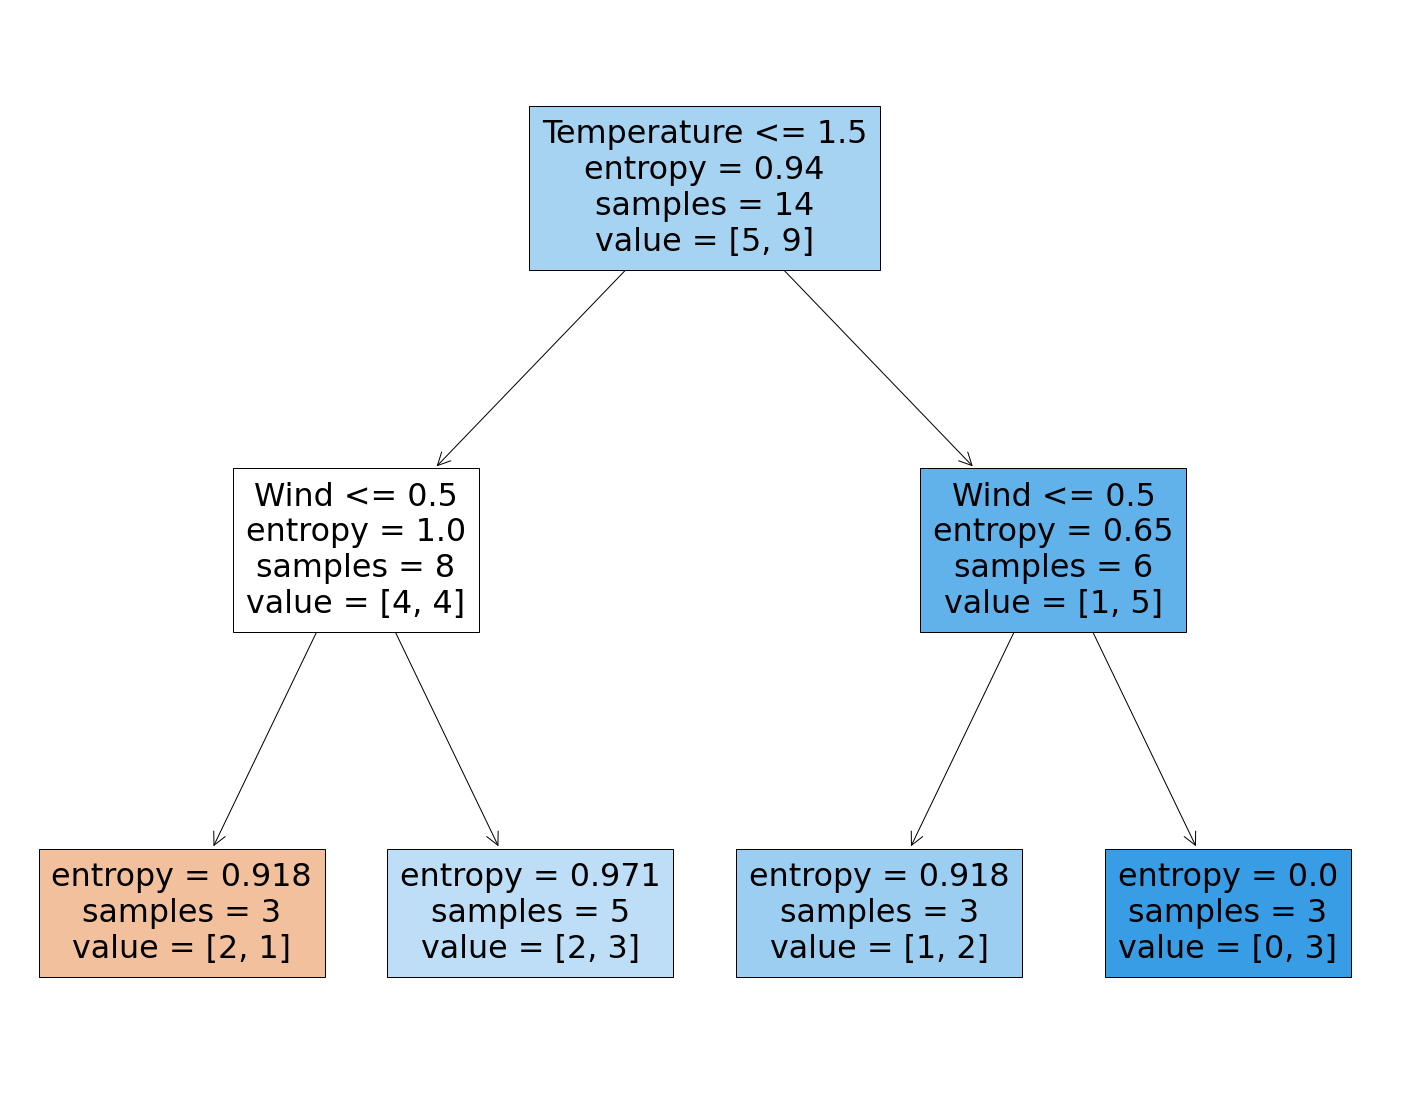

In [195]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dclf 
                   ,feature_names=data.columns
                   ,filled=True)

As can be seen above, the sklearn model agreed with our information gain build above and chose Wind as the first break. While the root node is Temperature, it is the raw dataset, with 5 no and 9 yes of 14 total samples and not broken out by hot, mild, cool.

Here the max depth was stopped at 2, meaning that Wind is the only input variable used to determine the leaves. As can be seen, the entropy is still very high for three of the four. As it stands now, this model would work poorly. The only proper entropy was the final leaf on the right.

## d. You are required to continue with the decision-tree growing process until all nodes are pure (they contain examples that all have the same classification). 


The the way a decision tree operates is by running the information gain function recursively until all leaves are pure, or until some stopping criteria has been applied. Sometimes it may not be possible to get full purity because some values will be indistinguishable with labels of other values.

For example, if two rows were as:

 - Hot, Strong, Long = Yes
 - Hot, Strong, Long = No
 
 There would be no way gather full purity. 
 
 In order to complete the tree, I will set max_depth to 'None.' This will allow the tree to recursively compare the entropy and infromation gain until it can gather no further purity.

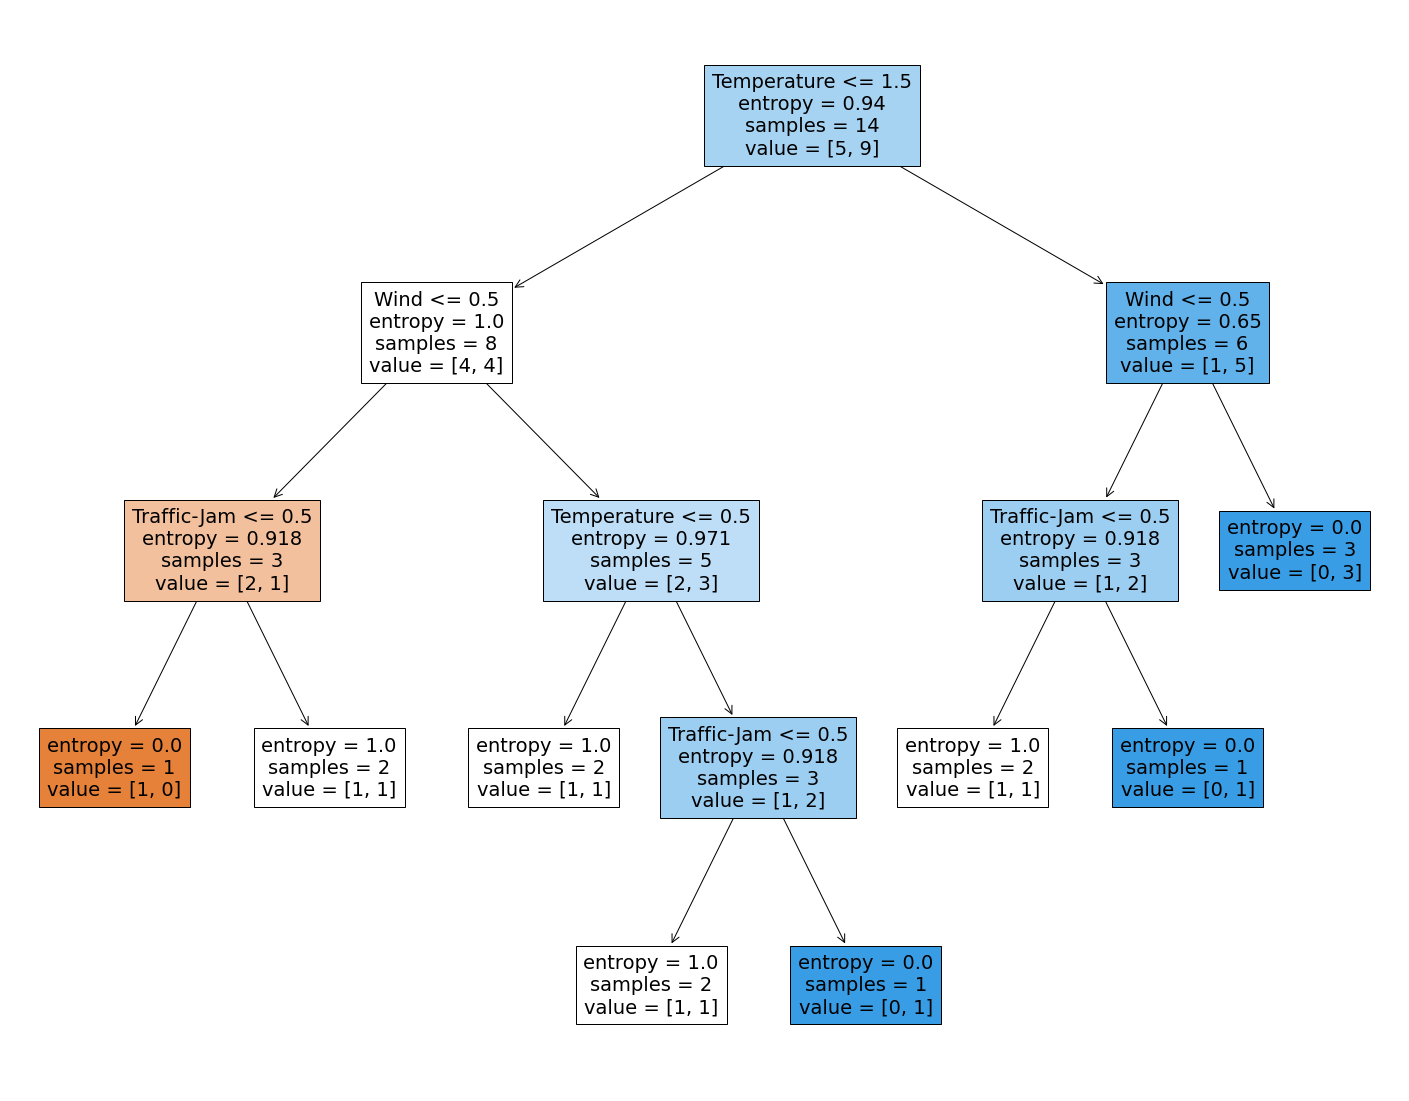

In [196]:
dclf = DecisionTreeClassifier(criterion='entropy' # used this instead of gini to be consistent
                              ,max_depth = None)     # let it do it's thing

# fit the new tree object
dclf.fit(X, y)

# plot the whole thing
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dclf 
                   ,feature_names=data.columns
                   ,filled=True)

## e. Will it be possible to reach this situation for the given dataset? If not, why not? (Hint: Look for inconsistencies in the given dataset.) 

In [200]:
data.sort_values(by=['Temperature', 'Wind', 'Traffic-Jam'])

,Temperature,Wind,Traffic-Jam,Car-driving
Day,,,,
6,cool,strong,short,yes
7,cool,strong,short,no
5,cool,weak,short,yes
9,cool,weak,short,no
2,hot,strong,long,no
1,hot,weak,long,no
3,hot,weak,long,yes
13,hot,weak,short,yes
12,mild,strong,long,yes


As I alluded to earlier, there are some labeling inconsistencies that will prevent the data from being perfectly classified.

As can bee seen on Days 6 and 7, each have the same exact input values, but different labels. This happens again at 12 and 14. There is no way to properly build a rule here simply because we do not have enough information. Should we be able to find more unique attributes, then perhaps we could get to the full purity, but as the data sits now it is not possible.

## f. Summarize the entire work in a technical report.